### Description:

Dataset Info:
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the files 'stores' and 'features'. Within this file you will find the following fields :-
-
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* IsHoliday - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate

### Acknowledgements
The dataset is taken from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Importing Libraries
2. Loading Dataset
3. Data Exploration
4. Data Preprocessing
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center> Importing Libraries

In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

# <center> Loading Dataset

In [5]:
features = pd.read_csv("features.csv.zip")
sample = pd.read_csv("sampleSubmission.csv.zip")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv.zip")
test = pd.read_csv("test.csv.zip")

# <center> Data Exploration (EDA)

In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
feature_store = features.merge(stores, how="inner", on = "Store").copy()

In [10]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [11]:
train_df = train.merge(feature_store, how="inner", on=['Store', 'Date', 'IsHoliday'])\
    .sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True).copy()

In [12]:
test_df = test.merge(feature_store, how="inner", on=['Store', 'Date', 'IsHoliday'])\
    .sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True).copy()

In [13]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [14]:
train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [15]:
train_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [16]:
feature_store['Date'] = pd.to_datetime(feature_store['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [17]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [18]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [19]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [20]:
feature_store['Day'] = feature_store['Date'].dt.isocalendar().day
feature_store['Week'] = feature_store['Date'].dt.isocalendar().week
feature_store['Month'] = feature_store['Date'].dt.month
feature_store['Year'] = feature_store['Date'].dt.isocalendar().year


In [21]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Day,Week,Month,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,5,2,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,5,6,2,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,5,7,2,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,5,8,2,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,5,9,3,2010


In [25]:
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday'])\
    .sort_values(by=['Store','Dept','Date']).reset_index(drop=True).copy()
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday'])\
    .sort_values(by=['Store','Dept','Date']).reset_index(drop=True).copy()

In [38]:
df_weeks.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,3,2010-12-31,8266.14,True,48.43,2.943,NaN,NaN,NaN,NaN,NaN,211.404932,7.838,A,151315,5,52,12,2010
334,1,3,2011-01-07,15808.15,False,48.27,2.976,NaN,NaN,NaN,NaN,NaN,211.404742,7.742,A,151315,5,1,1,2011
335,1,3,2011-01-14,13275.87,False,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,7.742,A,151315,5,2,1,2011
336,1,3,2011-01-21,12532.94,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315,5,3,1,2011


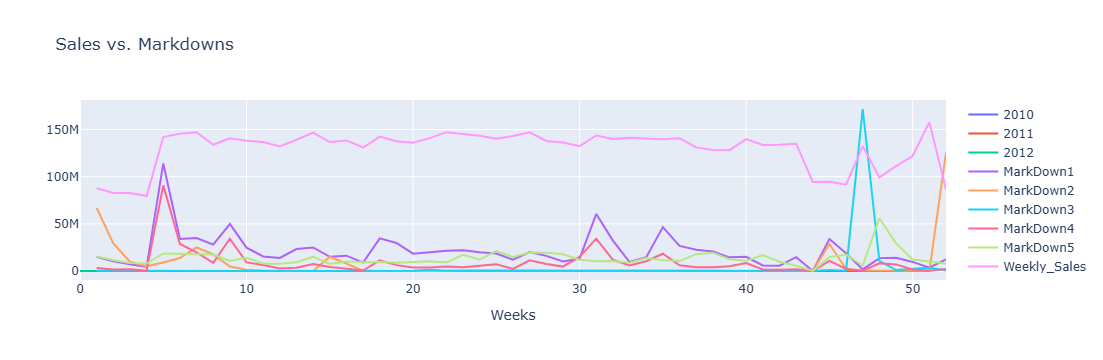

In [55]:
# Fix the groupby sum operation
df_weeks = train_df.groupby('Week').sum(numeric_only=True)

# Now create your plot
ig = go.Figure()
fig.add_trace(go.Scatter(x=df_weeks.index,
                         y=df_weeks['MarkDown1'], 
                         name='MarkDown1',
                         mode='lines'))
fig.add_trace(go.Scatter(x=df_weeks.index,
                         y=df_weeks['MarkDown2'], 
                         name='MarkDown2',
                         mode='lines'))
fig.add_trace(go.Scatter(x=df_weeks.index,
                         y=df_weeks['MarkDown3'], 
                         name='MarkDown3',
                         mode='lines'))
fig.add_trace(go.Scatter(x=df_weeks.index,
                         y=df_weeks['MarkDown4'], 
                         name='MarkDown4',
                         mode='lines'))
fig.add_trace(go.Scatter(x=df_weeks.index,
                         y=df_weeks['MarkDown5'], 
                         name='MarkDown5',
                         mode='lines'))
fig.add_trace(go.Scatter(x=df_weeks.index,
                         y=df_weeks['Weekly_Sales'], 
                         name='Weekly_Sales',
                         mode='lines'))
fig.update_layout(title="Sales vs. Markdowns", xaxis_title="Weeks")
fig.show()

Mean sales across years (Highest for Weekly Sales after 50 weeks)

In [40]:
# Weekly Sales per Year with Week

weekly_sales_by_week = train_df.groupby(by=["Year", "Week"], as_index=False).agg({"Weekly_Sales" : ["mean", "median"]}).copy()
weekly_sales_by_week_2010 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2010].copy()
weekly_sales_by_week_2011 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2011].copy()
weekly_sales_by_week_2012 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2012].copy()

weekly_sales_by_week_2010 = weekly_sales_by_week_2010.reset_index(drop=True)
weekly_sales_by_week_2011 = weekly_sales_by_week_2011.reset_index(drop=True)
weekly_sales_by_week_2012 = weekly_sales_by_week_2012.reset_index(drop=True)

weekly_sales_by_week = pd.concat([weekly_sales_by_week_2010, weekly_sales_by_week_2011, weekly_sales_by_week_2012], axis=1)
weekly_sales_by_week.head()

Year Week  Weekly_Sales            Year Week  Weekly_Sales            Year  \
                      mean    median                     mean    median         
0  2010    5  16836.121997  7904.690  2011    1  14599.244973  6384.990  2012   
1  2010    6  16352.056032  8365.095  2011    2  13891.283484  5961.710  2012   
2  2010    7  16216.658979  8411.250  2011    3  13932.367385  6139.315  2012   
3  2010    8  14899.549688  7235.800  2011    4  13566.239462  6227.980  2012   
4  2010    9  15921.015727  7717.975  2011    5  15773.448776  7312.115  2012   

  Week  Weekly_Sales           
                mean   median  
0    1  15121.231736  6586.37  
1    2  14168.266514  5914.86  
2    3  14221.357405  6146.31  
3    4  13494.232612  5785.84  
4    5  15480.553608  6859.65

In [41]:
# Weekly Sales per Year

weekly_sales_by_year = train_df.groupby(by=["Year"], as_index=False).agg({"Weekly_Sales" : ["mean", "median"]}).copy()

weekly_sales_by_year_2010 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2010].copy()
weekly_sales_by_year_2011 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2011].copy()
weekly_sales_by_year_2012 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2012].copy()

weekly_sales_by_year_2010 = weekly_sales_by_year_2010.reset_index(drop=True)
weekly_sales_by_year_2011 = weekly_sales_by_year_2011.reset_index(drop=True)
weekly_sales_by_year_2012 = weekly_sales_by_year_2012.reset_index(drop=True)

weekly_sales_by_year = pd.concat([weekly_sales_by_year_2010, weekly_sales_by_year_2011, weekly_sales_by_year_2012], axis=0)
weekly_sales_by_year.head()

Year  Weekly_Sales          
                 mean    median
0  2010  16270.275737  7964.300
0  2011  15954.070675  7522.020
0  2012  15694.948597  7365.095

Highest sale in year 2010

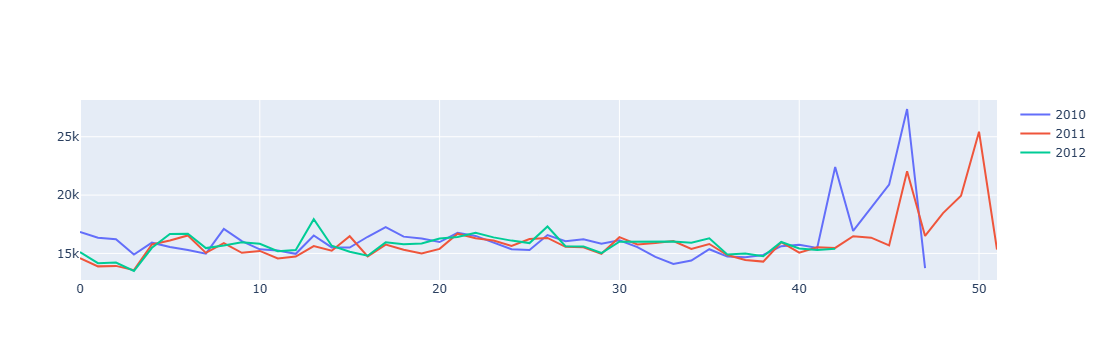

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=weekly_sales_by_week_2010.index, 
                     y=weekly_sales_by_week_2010["Weekly_Sales"]["mean"],
                     name="2010",
                     mode="lines"))
fig.add_trace(go.Scatter(x=weekly_sales_by_week_2011.index, 
                     y=weekly_sales_by_week_2011["Weekly_Sales"]["mean"],
                     name="2011",
                     mode="lines"))
fig.add_trace(go.Scatter(x=weekly_sales_by_week_2012.index, 
                     y=weekly_sales_by_week_2012["Weekly_Sales"]["mean"],
                     name="2012",
                     mode="lines"))

Clearly there is an increase of sales at the end of the year. Reasons could be anything like year end sales, special offers and discounts during that period, etc.

In [43]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010


<Axes: >

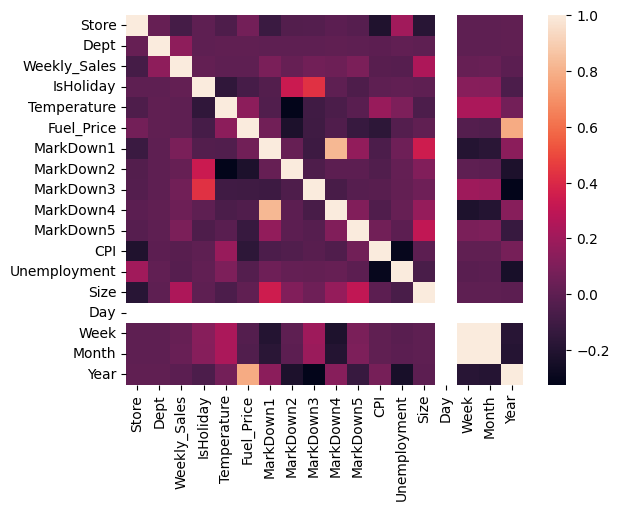

In [44]:
corr = train_df.corr(numeric_only=True)
corr
sns.heatmap(corr)

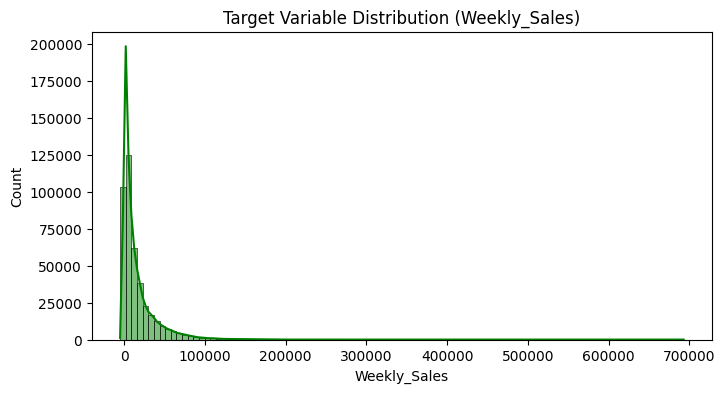

In [45]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.histplot(train_df['Weekly_Sales'], color='g',kde=True, bins=100)
plt.title('Target Variable Distribution (Weekly_Sales)')
plt.show()

As you can see, our target variable is right skewed/ positively skewed, i.e., here Mean > Mode > Median

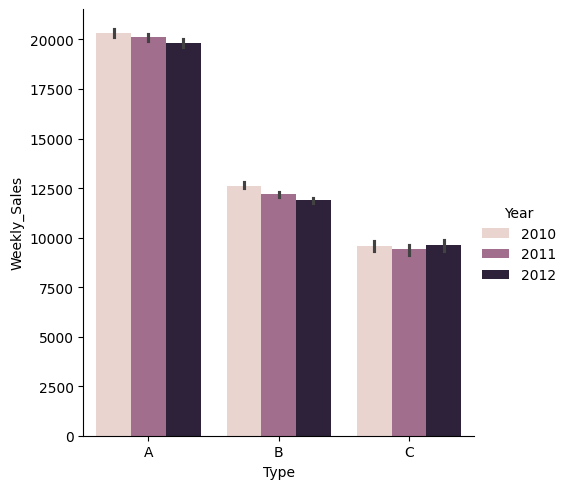

In [46]:
# Understanding 'Type' column for each year

sns.catplot(data=train_df, x="Type", y="Weekly_Sales", hue="Year", kind="bar")

<Figure size 1200x500 with 0 Axes>

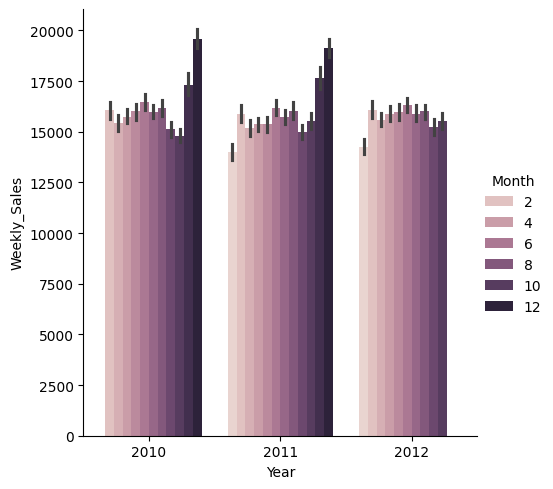

In [47]:
# Understanding month-wise sales for every year 

plt.figure(figsize=[12,5])
sns.catplot(data=train_df, x="Year", y="Weekly_Sales", hue="Month", kind="bar")
plt.show()

It seems like for year 2010 and 2011, month end sales (November & December) were high, however same was not seen for the year 2012.

In [48]:
train_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Day                     UInt32
Week                    UInt32
Month                    int32
Year                    UInt32
dtype: object

In [49]:
# Making categorical columns and numerical columns in separate lists

nf=[]
cf = ['Date', 'Store', 'Dept', 'IsHoliday', 'Type', 'Day', 'Month', 'Year']
for i in train_df.columns:
  if i not in cf:
    nf.append(i)
print(nf)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Week']


                                                Numeric Features Distribution                                                 


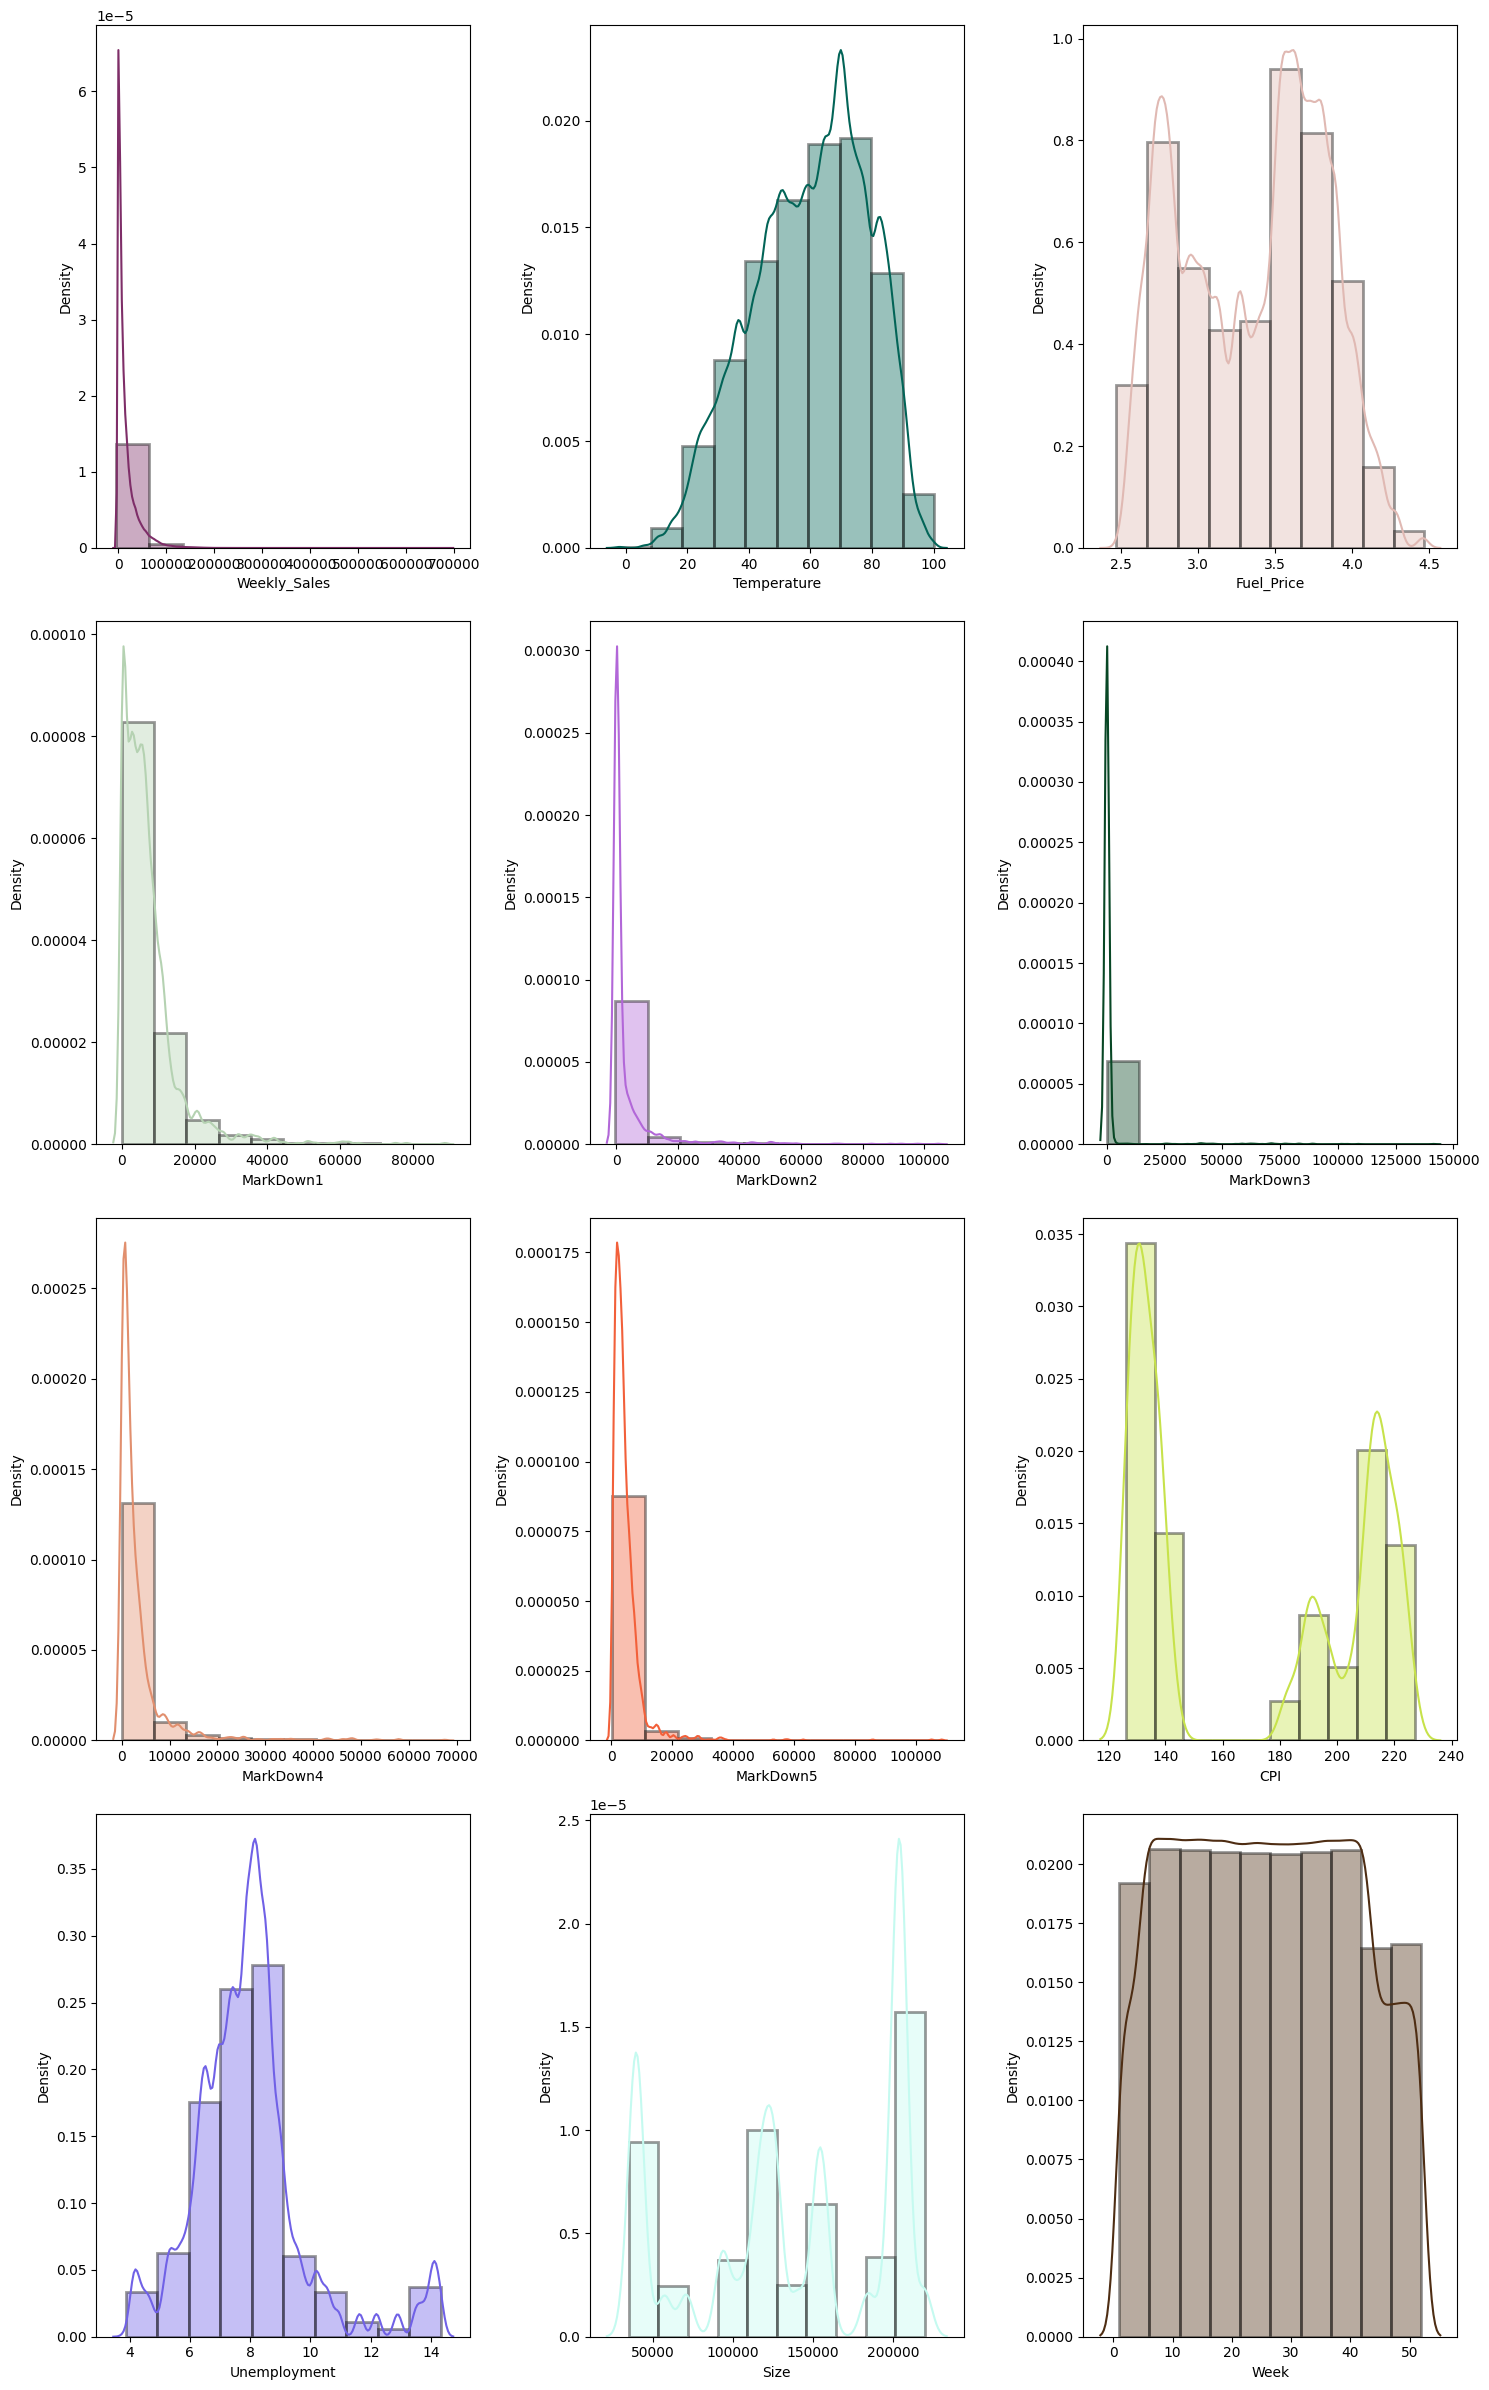

'\nplt.figure(figsize=[15,6*math.ceil(len(nf)/n)])\nfor i in range(len(nf)):\n    plt.subplot(math.ceil(len(nf)/3),n,i+1)\n    train_df.boxplot(nf[i])\nplt.tight_layout()\nplt.show()\n'

In [50]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(train_df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

'''
plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    train_df.boxplot(nf[i])
plt.tight_layout()
plt.show()
'''

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

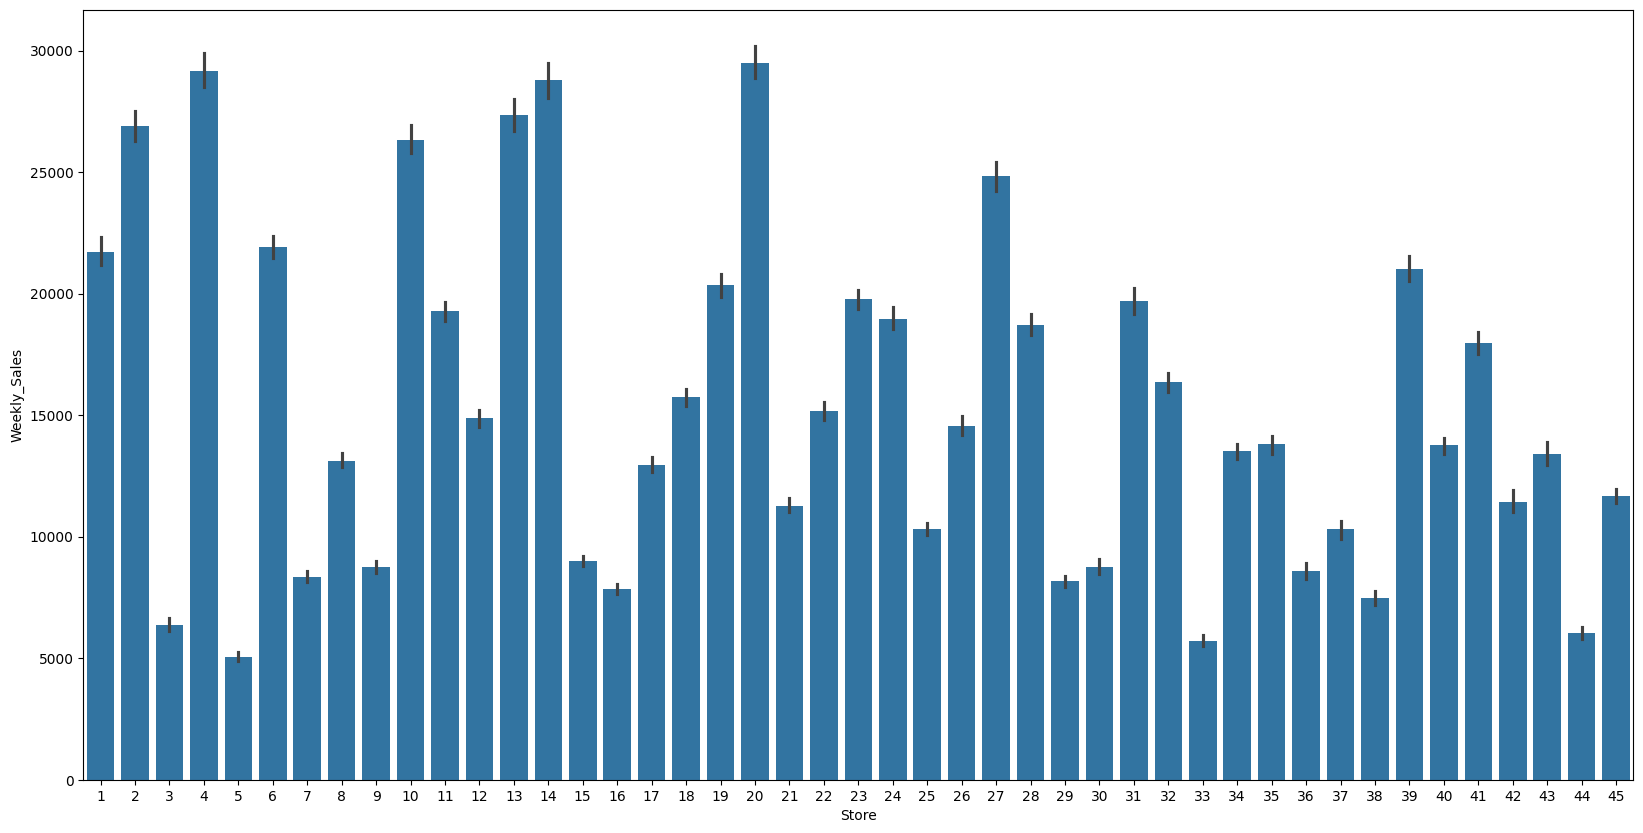

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_df.Store, y = train_df.Weekly_Sales)

Clearly after looking at the plot you can infer that the Store 20 has the maximum Weekly_Sales and Store 5 has the minimum Weekly_Sales.

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

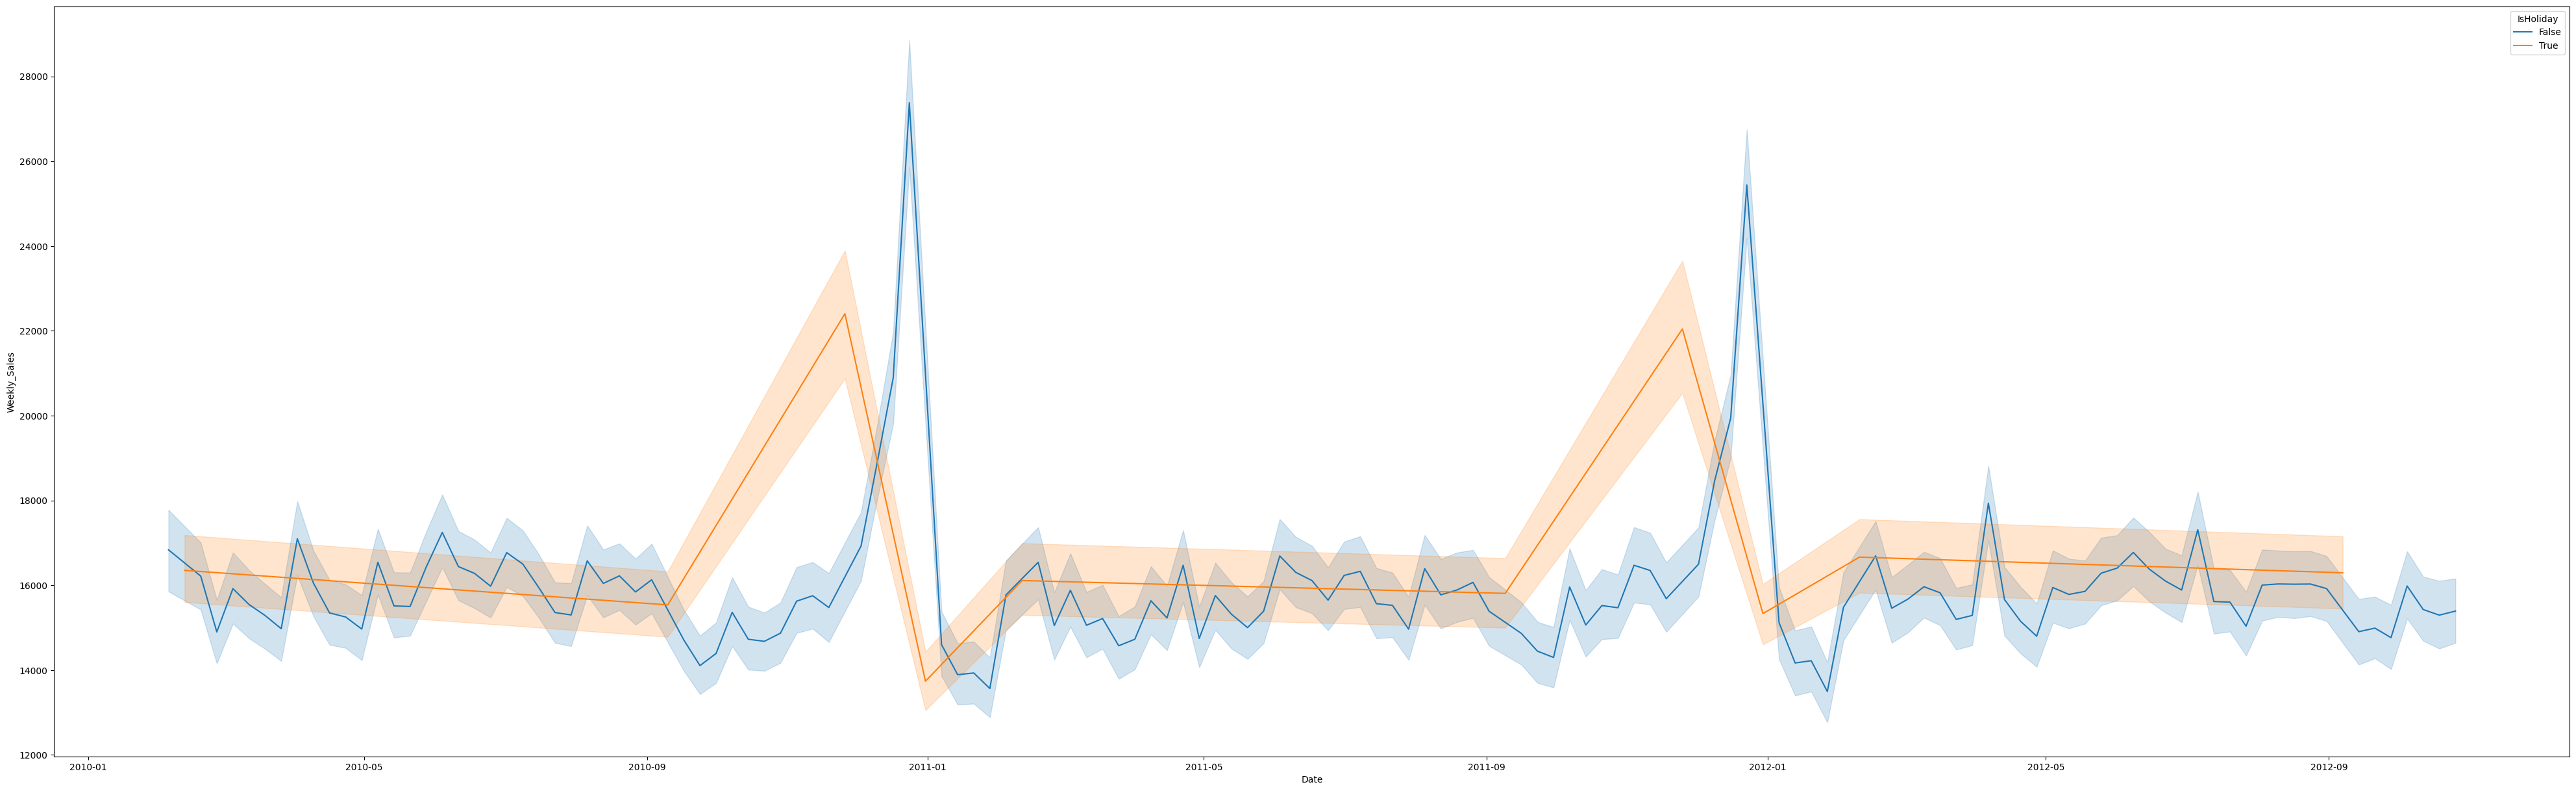

In [52]:
plt.figure(figsize=(50,15))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = train_df, hue='IsHoliday')

Also now if you look at this lineplot of Weekly_Sales for store 35 it is clear that how sales are varying with during a week of a year, which is highly variable. So you can say that there is very irregular sale pattern for store 35. During the holidays only it is seeing high amount of sales. So you can infer that the store 35 will be seeing high demands in products due sudden rise in sales during holiday seasons.

In [53]:
# Grouping Data by Year

growth = train_df.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%d-%m-%Y')
growth['Year'], growth['Month'] = growth['Date'].dt.year, growth['Date'].dt.month
growth

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,5,39,9,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,5,40,10,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,5,41,10,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,5,42,10,2012


It seems like Unemployment column is negatively correlated with Fuel_Price and CPI column, whereas CPI and Fuel_Price is positively correlated.

In [57]:
#let's Group the data.

hypothesis = growth.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'IsHoliday']]
factors  = hypothesis.get_group(1)
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()

<Axes: >

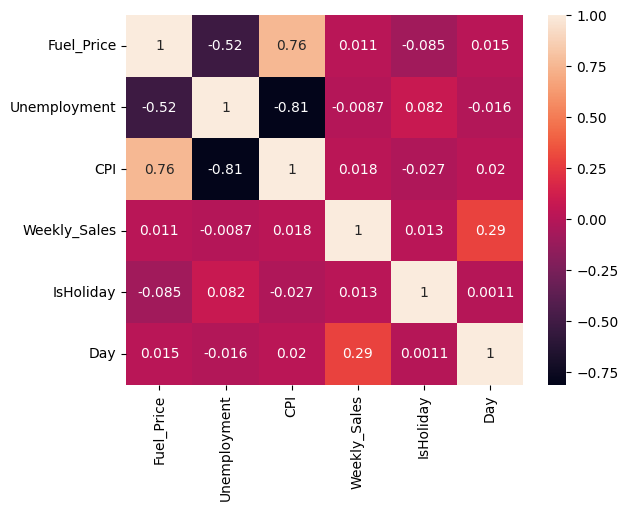

In [58]:
sns.heatmap(factors.corr(), annot = True)

In [59]:
factors

,Fuel_Price,Unemployment,CPI,Weekly_Sales,IsHoliday,Day
0,2.572,8.106,211.096358,24924.50,False,1
1,2.548,8.106,211.242170,46039.49,True,7
2,2.514,8.106,211.289143,41595.55,False,14
3,2.561,8.106,211.319643,19403.54,False,21
4,2.625,8.106,211.350143,21827.90,False,28
...,...,...,...,...,...,...
10239,3.638,6.908,222.305480,20.06,False,71673
10240,3.730,6.908,222.439015,0.05,True,71680
10241,3.717,6.908,222.582019,0.03,False,71687
10242,3.617,6.573,223.181477,635.00,False,71694


## Hypothesis of CPI, FuelPrice, Unemployment with Weekly_Sales 

### Hypothesis Testing - CPI

0.0
reject null hypothesis


<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

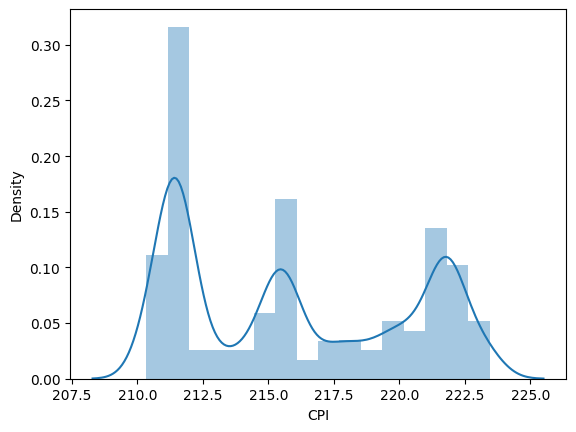

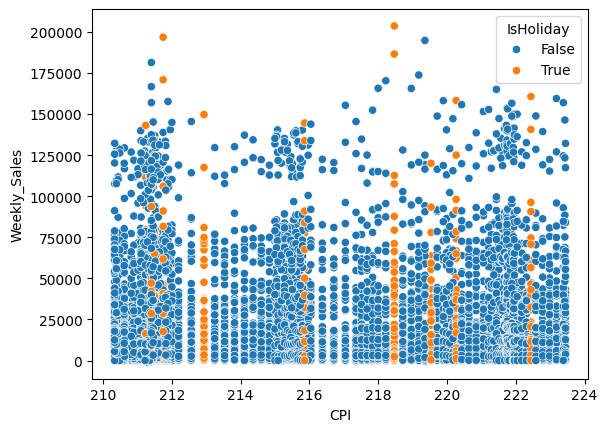

<Figure size 640x480 with 0 Axes>

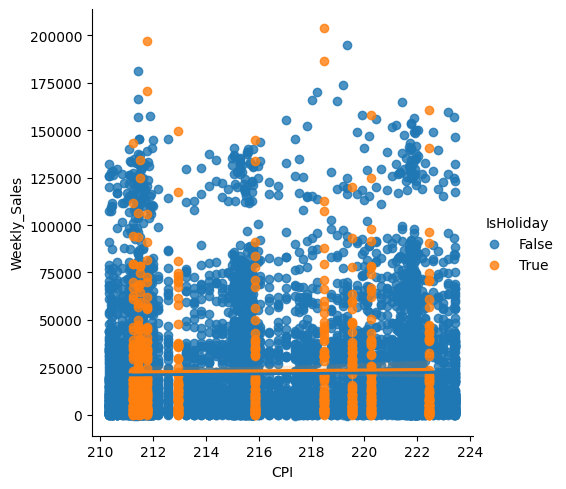

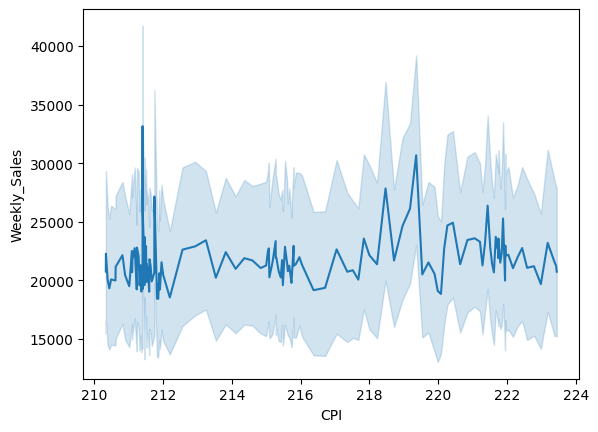

In [60]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

* Analysis

From the above plots, you can see how Weekly_Sales and CPI are correlated to each other. Also we rejected the null hypothesis saying that there is no relationship between Weekly_sales and CPI. But we found there is a positive corrlation between CPI and Weekly_sales, which we have found out by our statistical Modelling.

Also, the CPI is not normally distributed and line regression plot is showing how CPI is varying with Weekly_Sales on days of Holidays and non holiday weeks.

### Hypothesis Testing - Fuel_Price

0.0
reject null hypothesis


<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

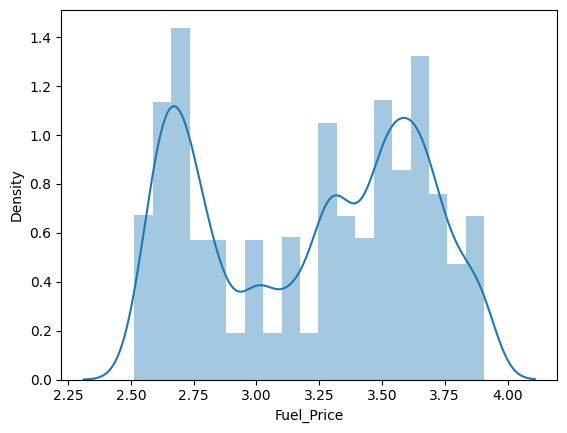

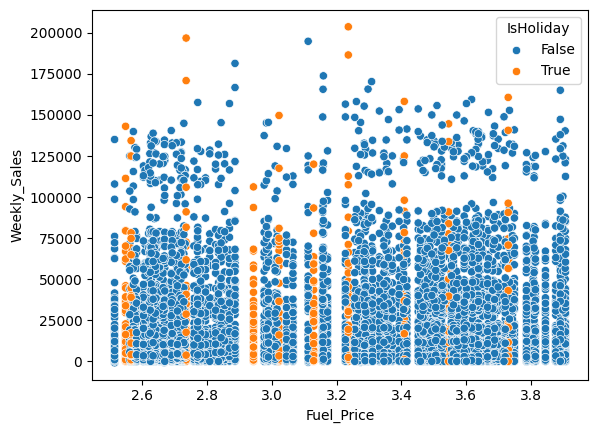

<Figure size 640x480 with 0 Axes>

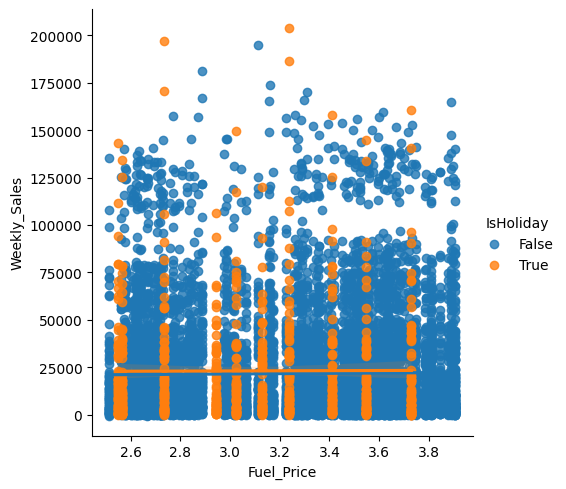

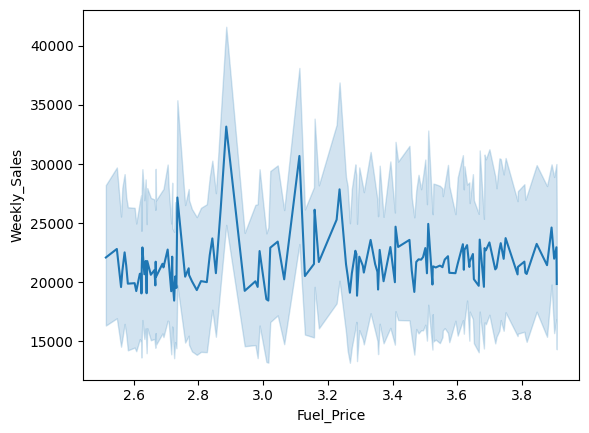

In [61]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

* Analysis

We can slight growth in Weekly_Sales with increase in Fuel_Price as suggested by alternate Hypothesis and the correlation plot from above.

It is unclear to comment on how mean is varying for Fuel_price as the distribution has two peaks and is varying alot. We can also see More numner of Sales when the Fuel_Price are higher speaking of which we can conclude that most of the people were able to afford the products sold. Whereas, we can see many Orange points i.e. Sales only during Holiday_Weeks when fuel_prices were fairly low.

### Hypothesis Testing - Unemployment

0.0
reject null hypothesis


<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

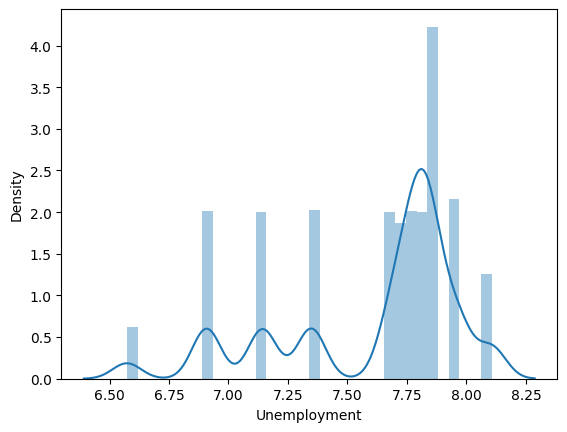

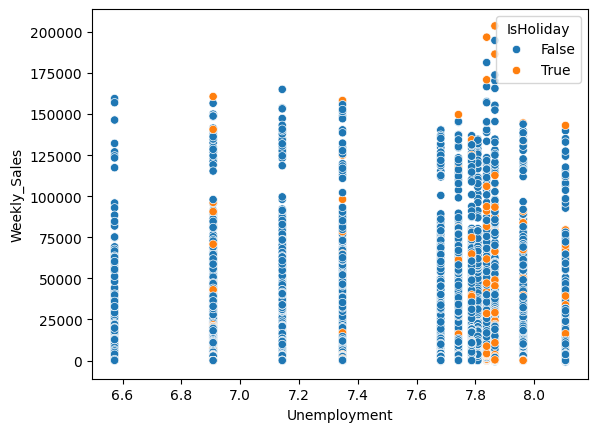

<Figure size 640x480 with 0 Axes>

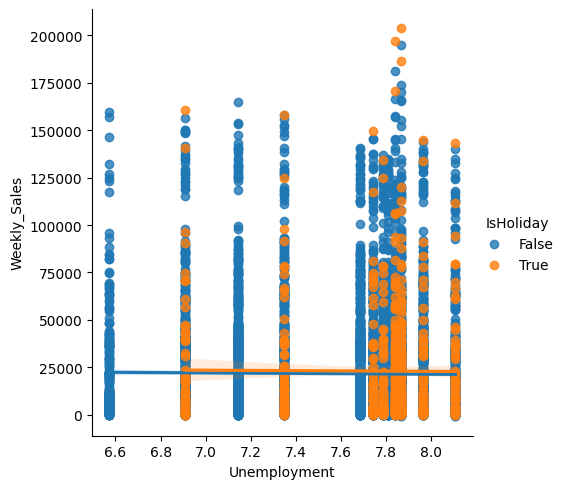

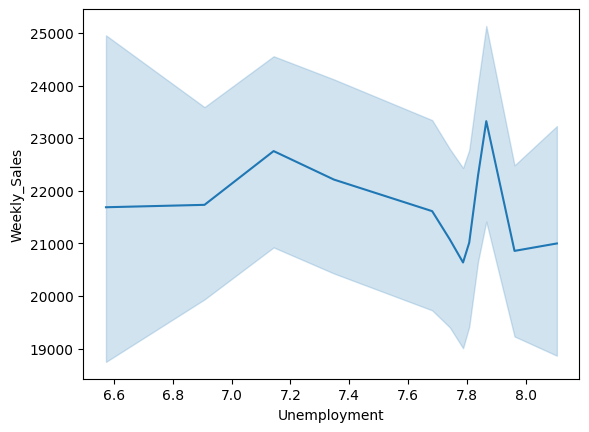

In [62]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

* Analysis

Plot 1 shows the distribution of Unemployment rate, whose mean is between 7.5 - 8.0, quite high.

Plot 2 and Plot 3 shows how weekly_sales are impacted because of rate of Unemployment as you can see as the rate of unemployment incrreases people only buy during holiday seasons, as there are only few outliers present for weekly_sales and which are on the day of Holiday. Speaking of which people only buy necessary products and try to save more.

Also we reject null hypothesis as weekly_sales and rate of unemployment are negatively correlated as suggested by our heatmap of the correlation. P value is less than alpha hence we reject null hypothesis and accept alterante hypothesis

### Plotting Weekly_sales day wise for store 1, by keeping holidays as a parameter to get more insights

<Axes: xlabel='Day', ylabel='Weekly_Sales'>

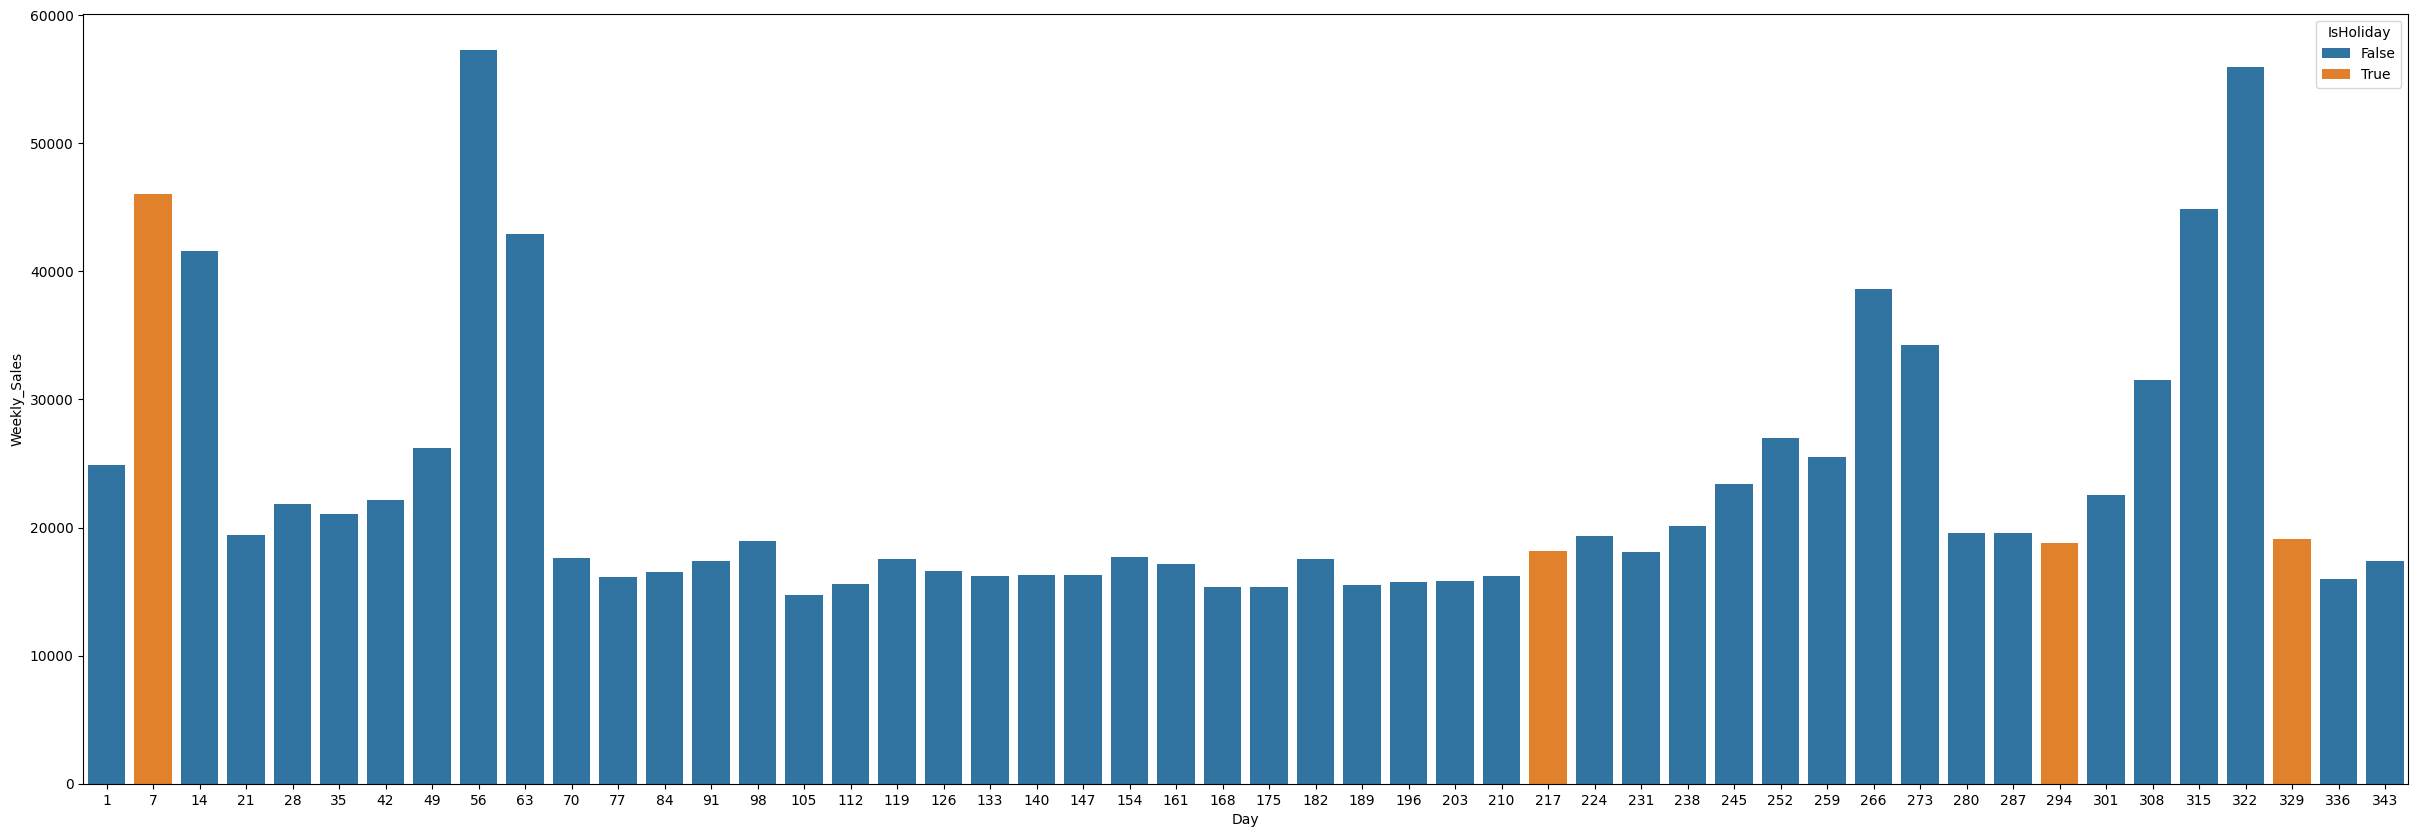

In [63]:
plt.figure(figsize=(30,10))
sns.barplot(x='Day', y = 'Weekly_Sales', data = factors.head(50), hue = 'IsHoliday')

# <center> Data Preprocessing 

In [64]:
test_df.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

In [65]:
train_data = train_df.copy()
test_data = test_df.copy()
train_data.fillna(0, inplace=True)


In [66]:
test_data.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

In [67]:
test_data['CPI'].fillna(test_data['CPI'].mean(), inplace=True)
test_data['Unemployment'].fillna(test_data['Unemployment'].mean(), inplace=True)
test_data.fillna(0, inplace=True)

In [68]:
test_data.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Day             0
Week            0
Month           0
Year            0
dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['IsHoliday'] = le.fit_transform(train_data['IsHoliday'])
test_data['IsHoliday'] = le.fit_transform(test_data['IsHoliday'])
train_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,5,9,3,2010


In [70]:
train_data['Type'] = le.fit_transform(train_data['Type'])
test_data['Type'] = le.fit_transform(test_data['Type'])

In [71]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,5,9,3,2010


In [72]:
train_data.corr(method="spearman", numeric_only=True)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
Store,1.000000,0.014351,-0.102241,-0.000546,-0.056964,0.074177,-0.033837,-0.054176,-0.030169,-0.094695,-0.021395,-0.230493,0.294783,0.150113,-0.159639,NaN,0.001077,0.001051,0.002944
Dept,0.014351,1.000000,-0.013764,0.000808,0.001082,0.003303,0.004629,0.003648,0.005229,0.003369,0.005226,-0.008951,0.006498,-0.010635,0.011152,NaN,0.000699,0.000723,0.003326
Weekly_Sales,-0.102241,-0.013764,1.000000,0.005622,-0.019752,0.001993,0.028768,0.033603,0.037627,0.055983,0.029297,-0.023190,-0.016481,-0.224948,0.289973,NaN,0.023328,0.023872,-0.016781
IsHoliday,-0.000546,0.000808,0.005622,1.000000,-0.144437,-0.080350,0.019018,0.063969,0.066538,0.020766,0.015241,-0.004371,0.010456,-0.000680,0.000566,NaN,0.118563,0.118579,-0.056416
Temperature,-0.056964,0.001082,-0.019752,-0.144437,1.000000,0.127758,-0.018741,-0.130960,-0.073936,-0.033236,-0.028192,0.172553,0.029806,0.019097,-0.042945,NaN,0.243319,0.241262,0.065976
Fuel_Price,0.074177,0.003303,0.001993,-0.080350,0.127758,1.000000,0.468784,0.289380,0.401530,0.428308,0.444046,-0.041176,-0.060405,0.035087,0.004352,NaN,-0.035006,-0.045654,0.761595
MarkDown1,-0.033837,0.004629,0.028768,0.019018,-0.018741,0.468784,1.000000,0.783686,0.901019,0.953158,0.967822,0.184468,-0.229054,-0.056088,0.075136,NaN,-0.016808,-0.025664,0.799985
MarkDown2,-0.054176,0.003648,0.033603,0.063969,-0.130960,0.289380,0.783686,1.000000,0.713975,0.776599,0.776207,0.147771,-0.182359,-0.087027,0.100114,NaN,-0.089407,-0.101851,0.607671
MarkDown3,-0.030169,0.005229,0.037627,0.066538,-0.073936,0.401530,0.901019,0.713975,1.000000,0.868615,0.903350,0.166963,-0.208524,-0.053646,0.085753,NaN,0.062972,0.059049,0.697235
MarkDown4,-0.094695,0.003369,0.055983,0.020766,-0.033236,0.428308,0.953158,0.776599,0.868615,1.000000,0.924481,0.175404,-0.221480,-0.103638,0.136681,NaN,-0.006906,-0.014057,0.741685


# <center> Predictive Modelling

In [73]:
features = ["Week", "CPI", "Unemployment", "Size", 'Type', 'Dept', 'Store']
train_data[features]
train_data["Week"] = train_data['Week'].astype(int)

In [74]:
from sklearn.model_selection import train_test_split
X = train_data[features].copy()
y = train_data['Weekly_Sales'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

In [75]:
#!pip install catboost

In [78]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [87]:
models = {
    'lr' : linear_model.LinearRegression(),
    'xgb' : xgb.XGBRegressor(random_state=1, objective='reg:squarederror'),
    'cb' : cb.CatBoostRegressor(random_state=1, verbose=False),
    'lgb' : lgb.LGBMRegressor(random_state=1),
    'rfr' : RandomForestRegressor(random_state=1)
}

In [88]:
def valid_model(name, model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    
    preds = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, preds, squared=False)
    
    return rmse

In [89]:
for name, model in models.items(): 
    rmse = valid_model(name, model, X_train, y_train, X_valid, y_valid)
    print(f"{name} : {rmse}")

lr : 21806.14289744873
xgb : 5230.980169057658
cb : 5579.467061712058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 7
[LightGBM] [Info] Start training from score 15979.221909
lgb : 6812.897599572987
rfr : 3635.115383925006


In [92]:
RF = RandomForestRegressor(random_state=1)
RF.fit(X, y)

RandomForestRegressor(random_state=1)

In [93]:
test = test_data[features].copy()
preds = RF.predict(test)
preds

array([31158.8013, 18724.9468, 18780.5284, ...,   122.8732,   119.933 ,
         123.5785])

In [94]:
sample['Weekly_Sales'] = preds
sample.to_csv('predictions.csv', index=False)

# <center> Project Outcomes & Insights

* Weekly_sales are impacted because of rate of Unemployment as when the rate of unemployment increases people only buy during holiday seasons, as there are only few outliers present for weekly_sales and which are on the day of Holiday. Speaking of which people only buy necessary products and try to save more.

* The Sales are very high during November and December and go down in January. So its better to employee more staff as casual employee in November and December and encourage permanent staff to take leaves during January.

* The predicted sales data can be used to analyse the sales pattern and accordingly adjust the staff in the store.

* As sales increases by a slight margin when temperature is less, hence it states people prefer to go for shopping in less temperatures unless it is a holiday week.

* The CPI is not normally distributed and line regression plot is showing how CPI is varying with Weekly_Sales on days of Holidays and non holiday weeks

* CPI, Fuel_Price are positively correlated with Weekly_Sales whereas, rate of Unemployment is fairly negatively correlated and we have seen drop in weekly_sales of Products due to increase of rate of unemployment.

* Top performing stores according to the historical data are Store number 20, 4, 14, 13, 2

* Worst performing stores according to the historical data are Store number 33, 5, 36, 38, 3. The difference between the highest and lowest performing stores 3608700.2 for Weekly_Sales.



* There are quarters in which stores major loss, due to high rate of unemployment, mostly during the spring sem altogether we can expect less weekly_sales as compared to spring semester.

* Mostly people try to buy expensive products during the holiday seasons likely to be christmas and Super bowl days where we have seen rise in weekly_sales of Product.

* Store 20 is overall doing fine in terms of Weekly_sales, as analysed it is the only store with max weekly_sales, whereas Store 35 has no particular pattern of Weekly_Sales due to high variance observed.

* Walmart should invest in marketing of expensive products during the spring sem, to get more customer base for such products, also should only open the supply chain for the prodcuts which are in demand during that season.

## Here are some of the key outcomes of the project:
- The Dataset was quiet small with just 6435 samples & after preprocessing 7.5% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.



---